# A brief map of the Machine Learning Ecosystem...
SGMS 2025

In [26]:
try:
    from graphviz import Digraph
except ImportError:
    print("Please install graphviz: pip install graphviz")
try:
    import pygraphviz
except ImportError:
    print("Please install pygraphviz: pip install pygraphviz")


Please install graphviz: pip install graphviz
Please install pygraphviz: pip install pygraphviz


In [27]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pydot
import matplotlib.pyplot as plt
import networkx as nx
import ipywidgets as widgets
from IPython.display import display
from matplotlib.patches import FancyBboxPatch

Lets define 

Markdown Scheme:

##**Machine Learning**
    - **Supervised**
        - **Classification**
            - Naive Bayes
            - Logistic Regression
            - K-Nearest Neighbor (KNN)
            - Random Forest
            - Support Vector Machine (SVM)
            - Decision Tree
            - Simple Linear Regression
            - Multivariate Regression
            - Lasso Regression
        - **Regression**   
            - Simple Linear Regression
            - Multivariate Regression
            - Lasso Regression
    - **Unsupervised**
        - **Clustering**
            - K-Means Clustering
            - DBSCAN Algorithm
            - Principal Component Analysis
            - Independent Component Analysis
        - **Association**
            - Frequent Pattern Growth
            - Apriori Algorithm
            - Z-score Algorithm
            - Isolation forest Algorithm
    - **Semi-Supervised**
        - **Classification** 
            - Self-Training
            - Co-Training
        - **Regression**
            - Self-Training
            - Co-Training
    - **Reinforcement Learning**
        - **Model-Free**
            - Policy Optimisation
            - Q-Learning
        - **Model-Based**
            - Learn the Model
            - Given the Model

Nice Expanders:

In [29]:
def create_expander(title, children):
    """Creates an expandable widget with nested items."""
    expander = widgets.Accordion(children=[widgets.VBox(children)])
    expander.set_title(0, title)
    return expander

# Supervised Learning
classification = create_expander("Classification", [
    widgets.Label("• Naive Bayes"),
    widgets.Label("• Logistic Regression"),
    widgets.Label("• K-Nearest Neighbor (KNN)"),
    widgets.Label("• Random Forest"),
    widgets.Label("• Support Vector Machine (SVM)"),
    widgets.Label("• Decision Tree"),
    widgets.Label("• Simple Linear Regression"),
    widgets.Label("• Multivariate Regression"),
    widgets.Label("• Lasso Regression"),
])

regression = create_expander("Regression", [
    widgets.Label("• Simple Linear Regression"),
    widgets.Label("• Multivariate Regression"),
    widgets.Label("• Lasso Regression"),
])

supervised = create_expander("Supervised", [classification, regression])

# Unsupervised Learning
clustering = create_expander("Clustering", [
    widgets.Label("• K-Means Clustering"),
    widgets.Label("• DBSCAN Algorithm"),
    widgets.Label("• Principal Component Analysis"),
    widgets.Label("• Independent Component Analysis"),
])

association = create_expander("Association", [
    widgets.Label("• Frequent Pattern Growth"),
    widgets.Label("• Apriori Algorithm"),
    widgets.Label("• Z-score Algorithm"),
    widgets.Label("• Isolation Forest Algorithm"),
])

unsupervised = create_expander("Unsupervised", [clustering, association])

# Semi-Supervised Learning
semi_classification = create_expander("Classification", [
    widgets.Label("• Self-Training"),
    widgets.Label("• Co-Training"),
])

semi_regression = create_expander("Regression", [
    widgets.Label("• Self-Training"),
    widgets.Label("• Co-Training"),
])

semi_supervised = create_expander("Semi-Supervised", [semi_classification, semi_regression])

# Reinforcement Learning
model_free = create_expander("Model-Free", [
    widgets.Label("• Policy Optimisation"),
    widgets.Label("• Q-Learning"),
])

model_based = create_expander("Model-Based", [
    widgets.Label("• Learn the Model"),
    widgets.Label("• Given the Model"),
])

reinforcement = create_expander("Reinforcement Learning", [model_free, model_based])

# Display everything
display(widgets.VBox([supervised, unsupervised, semi_supervised, reinforcement]))

Then, lets draw it!

We start by drawing the Nodes and Edges of our graph:

In [30]:
machine_learning_algorithms = {
    "Machine Learning": {
        "Supervised": {
            "Classification": [
                "Naive Bayes", "Logistic Regression", "K-Nearest Neighbor (KNN)",
                "Random Forest", "Support Vector Machine (SVM)", "Decision Tree"
            ],
            "Regression": [
                "Simple Linear Regression", "Multivariate Regression", "Lasso Regression"
            ]
        },
        "Unsupervised": {
            "Clustering": [
                "K-Means Clustering", "DBSCAN Algorithm",
                "Principal Component Analysis", "Independent Component Analysis"
            ],
            "Association": [
                "Frequent Pattern Growth", "Apriori Algorithm"
            ],
            "Anomaly Detection": [
                "Z-score Algorithm", "Isolation Forest Algorithm"
            ]
        },
        "Semi-Supervised": {
            "Classification": ["Self-Training"],
            "Regression": ["Co-Training"]
        },
        "Reinforcement": {
            "Model-Free": ["Policy Optimization", "Q-Learning", "Learn the Model"],
            "Model-Based": ["Given the Model"]
        }
    }
}

And a nice Graph:

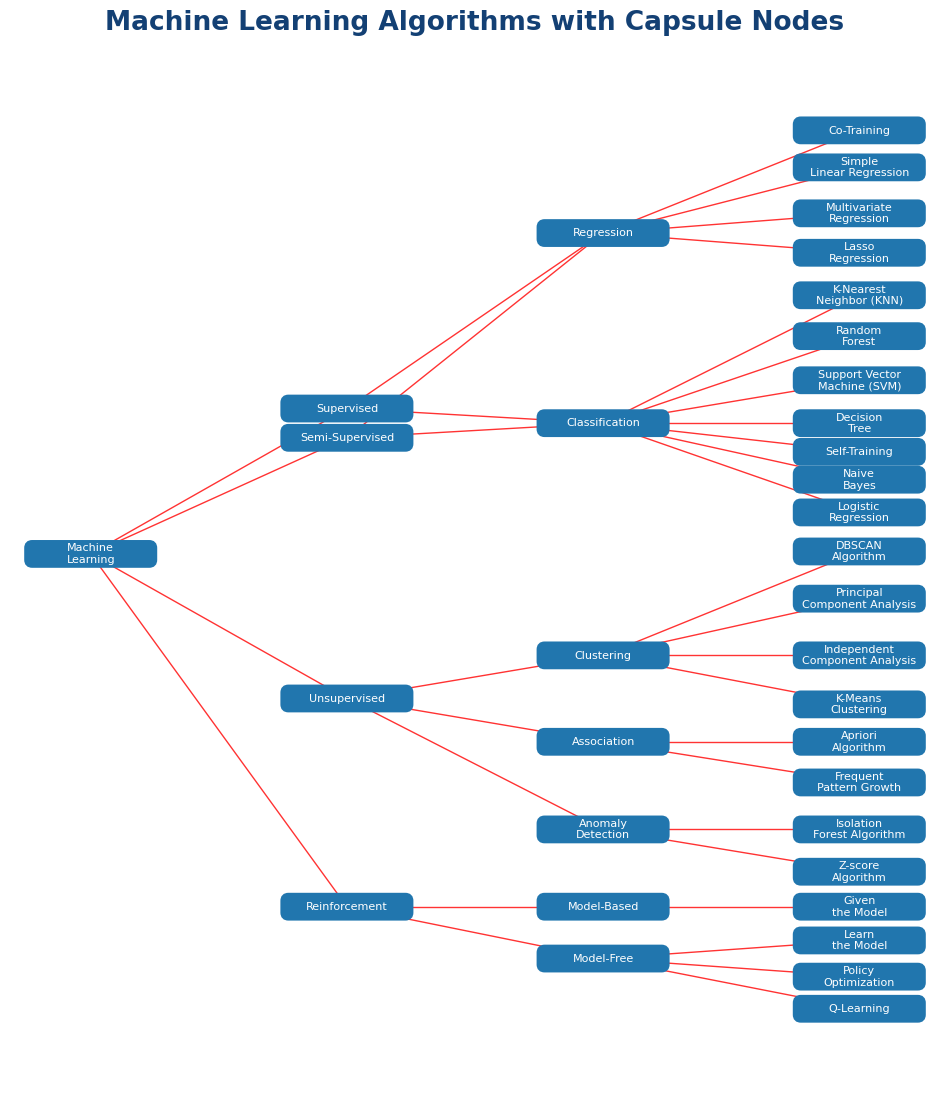

In [185]:
# Create a directed graph
G = nx.DiGraph()

# First, we use a recursive function so we can add nodes and edges. With this,
# our graph will obey the hierarchy.

def add_edges(parent, subtree):
    for child, values in subtree.items():
        G.add_edge(parent, child)
        if isinstance(values, dict):
            add_edges(child, values)
        elif isinstance(values, list):
            for value in values:
                G.add_edge(child, value)

# Add edges starting from the root
add_edges("Machine Learning", machine_learning_algorithms["Machine Learning"])

# Now, let's split the labels into two lines:
def split_label(label):
    words = label.split()
    if len(words) > 1:
        mid = len(words) // 2
        return "\n".join([" ".join(words[:mid]), " ".join(words[mid:])])
    return label

# And update to get multiline text labels:
node_labels = {node: split_label(node) for node in G.nodes}


# Generate a tree-like layout
pos = nx.drawing.nx_pydot.pydot_layout(G, prog="dot") 
pos = {node: (x * 4, y *70) for node, (x, y) in pos.items()}

rotated_pos = {node: (-y, -x) for node, (x, y) in pos.items()}

# Now, we will create a function that will help us have capsule nodes instead of circles:
def draw_capsule_nodes(ax, pos, labels, node_color="#EEF4ED", edge_color="#EEF4ED"):
    for node, (x, y) in pos.items():
        label = labels[node]
        capsule_width = 2300  # Capsule width (adjust as needed)
        capsule_height = 230
        # Create capsule-like shapes
        bbox = FancyBboxPatch(
            (x - capsule_width / 2,y- capsule_height / 2),
            capsule_width,
            capsule_height,
            boxstyle="round,pad=90",
            edgecolor="#2176AE",
            facecolor="#2176AE",
            lw=5,
        )
        
        ax.add_patch(bbox)
        # Add text with multiline support
        ax.text(x, y, label, ha="center", va="center", fontsize=8, color="white", zorder=2,
        )

fig, ax = plt.subplots(figsize=(12, 16))
ax.set_aspect("equal")
ax.axis("off")

# Draw edges
nx.draw_networkx_edges(G, rotated_pos, ax=ax, arrows=False, edge_color="#FF3333")

# Draw capsules and labels
draw_capsule_nodes(ax, rotated_pos, node_labels)

plt.title("Machine Learning Algorithms with Capsule Nodes", font="DejaVu Sans",fontsize=19, fontweight="bold", color='#134074', zorder=1)
plt.show()